# Optimization algorithms

I want to know which ambulance to send. 

- Travel time: lower = benefit single case
- Coverage disruption = drop in % for primary and secondary

In [ ]:
import execute
execute.initial(run=False)

Next Step will probably be to write a function that returns the best estimate time traveled between base --> nearest demand point. 

## Step 1: set coverage algorithm

a) through k-means, find a set of 8 ambulances that has all of Tijuana covered by primary

For each representative call point, find the bases. 



-----------------------------------------------------
[  32.47420523 -116.91634326]  with distance of 0.41 km  
-----------------------------------------------------
([32.477726, -116.91617, 901], 0.39077578808812424)
([32.476684, -116.913311, 910], 0.39599031776390764)


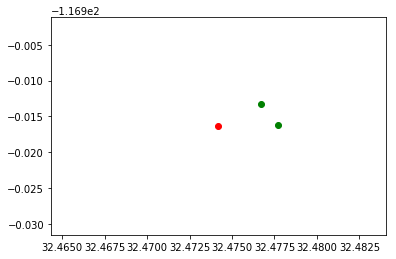



-----------------------------------------------------
[  32.46988387 -116.87157796]  with distance of 0.55 km  
-----------------------------------------------------
([32.468865, -116.971533, 919], 0.5353801535182507)


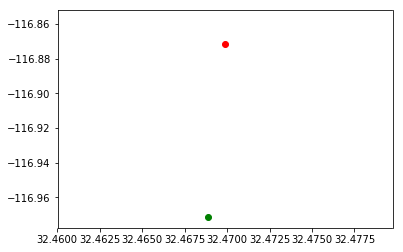



-----------------------------------------------------
[  32.47602022 -117.00154719]  with distance of 0.28 km  
-----------------------------------------------------
([32.475283, -116.887392, 623], 0.26417215364163005)


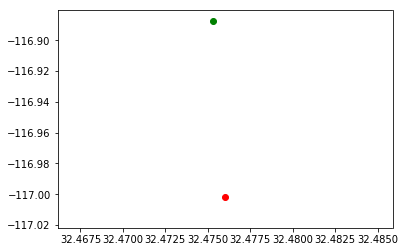



-----------------------------------------------------
[  32.51267281 -116.87887109]  with distance of 0.08 km  
-----------------------------------------------------
([32.513176, -116.878455, 461], 0.06813500074057015)


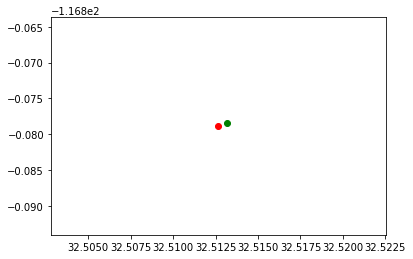



-----------------------------------------------------
[  32.47787571 -116.82365489]  with distance of 0.37 km  
-----------------------------------------------------
([32.479336, -116.820351, 943], 0.3502474283139104)


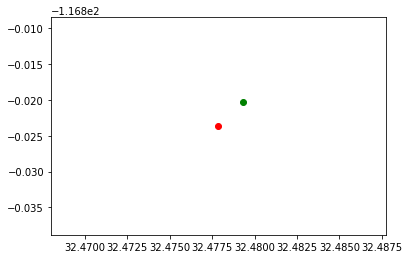



-----------------------------------------------------
[  32.52517201 -116.92788462]  with distance of 0.25 km  
-----------------------------------------------------
([32.52309, -117.121773, 722], 0.23255732923780262)


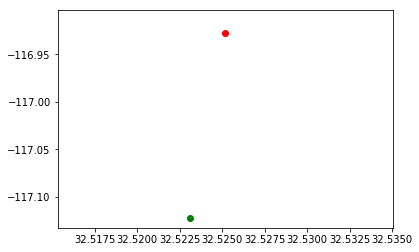



-----------------------------------------------------
[  32.51034584 -117.07895792]  with distance of 0.31 km  
-----------------------------------------------------
([32.512999, -117.078978, 740], 0.2942298957436682)
([32.513005, -117.078885, 749], 0.2949688187426851)


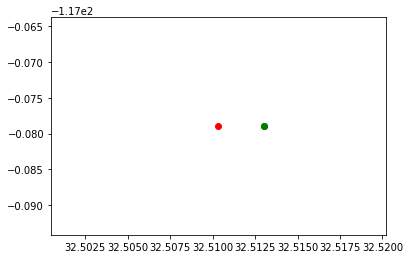



-----------------------------------------------------
[  32.5167102  -116.97720546]  with distance of 0.17 km  
-----------------------------------------------------
([32.516243, -117.028912, 207], 0.15878250744263991)


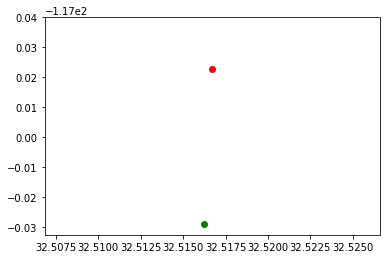



-----------------------------------------------------
[  32.46879338 -116.95291805]  with distance of 0.08 km  
-----------------------------------------------------
([32.469103, -116.953481, 659], 0.06308486323454085)


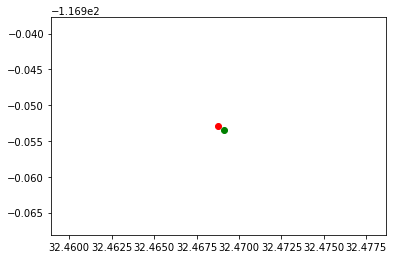



-----------------------------------------------------
[  32.51672472 -117.03730054]  with distance of 0.17 km  
-----------------------------------------------------
([32.516243, -117.028912, 207], 0.15878250744263991)


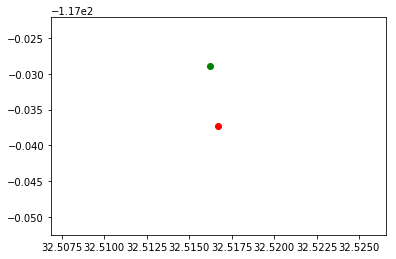

<< EOF >>


In [ ]:
starter_set = execute.find_starting_set(run=True, display = True)

b) find the set of 8 that covers all primary and maximized the secondary coverage. 
- After having the set of all base combinations that satisfied r1 = 10, find the set with the highest percentage covered by r2=14



In [ ]:
execute.check_coverage(starter_set)

100

In [ ]:
# this is just for fun. find ten different sets and check the coverage.
for x in range (25):
    new_set = execute.find_starting_set(run=True)
    num_coverage = execute.check_coverage(new_set)
    print(x, "\t", num_coverage)

0 	 100
1 	 100
2 	 100
3 	 100
4 	 100
5 	 100
6 	 100
7 	 100
8 	 100
9 	 100
10 	 100
11 	 100
12 	 100
13 	 100
14 	 100
15 	 100
16 	 100
17 	 100
18 	 100
19 	 100
20 	 100
21 	 100
22 	 100
23 	 100
24 	 100


In [ ]:
# one more thing, do the same thing but send in only 7 bases.
for x in range (25):
    new_set = execute.find_starting_set(run=True)
    num_coverage = execute.check_coverage(new_set[0:7])
    print(x, "\t", num_coverage)

0 	 100
1 	 100
2 	 100
3 	 100
4 	 100
5 	 100
6 	 100
7 	 100
8 	 100
9 	 100
10 	 100
11 	 100
12 	 100
13 	 100
14 	 100
15 	 100
16 	 100
17 	 100
18 	 100
19 	 100
20 	 100
21 	 100
22 	 100
23 	 100
24 	 100


## Step 2: where the fun is

a) Find the travel times of each of the 8 ambulances, through lookup or query

b) Find the set disruption each ambulance would cause, as a result of r1 and r2. Include severity as a parameter. 
Coverage = Primary Coverage + Secondary Coverage 

## Step 3: 

a) Implement the dynamic, iterative case. 

## Various TODOs

- Add background image: https://stackoverflow.com/questions/15160123/adding-a-background-image-to-a-plot-with-known-corner-coordinates

- Remove redundant Mexico City information